In [516]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [448]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(len(train))
print(len(test))

891
418


1. 명목형 변수인 성별을 dummy 변수로 만들기

In [449]:
train= train.join(pd.get_dummies(train['Sex']).add_prefix('Sex_'))
test= test.join(pd.get_dummies(test['Sex']).add_prefix('Sex_'))

In [450]:
# drop axis의 경우 column이면 1, row이면 0이다.
train.drop('Sex', axis=1, inplace=True)
test.drop('Sex', axis=1, inplace=True)

In [451]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_female       0
Sex_male         0
dtype: int64

In [452]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Sex_female       0
Sex_male         0
dtype: int64

2. PassengerId 필요 없으니 Column 삭제

In [453]:
train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

3. 결측값이 있는 Embarked가 포함된 데이터 행에 임의 값  
<br>Embarked : 승선한 항

In [454]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [455]:
train['Embarked'].fillna('S',inplace=True)

In [456]:
train.isnull().sum()

Survived        0
Pclass          0
Name            0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        0
Sex_female      0
Sex_male        0
dtype: int64

In [457]:
train= train.join(pd.get_dummies(train['Embarked']).add_prefix('Embarked_'))
test= test.join(pd.get_dummies(test['Embarked']).add_prefix('Embarked_'))

In [458]:
train.drop('Embarked', axis=1, inplace=True)
test.drop('Embarked', axis=1, inplace=True)

In [459]:
test.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1,0,0,0,1
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,1,0
3,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,1,0,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,1,0,0,0,1


4. Name에서 Mr, Miss, Mrs 등등을 추출하자 - 어차피 이름 자체는 큰 의미가 없으니까..

In [460]:
train['Name']=train.Name.str.extract('([A-Za-z]+)\.') 
test['Name']=test.Name.str.extract('([A-Za-z]+)\.') 

In [461]:
train['Name'].unique() # 종류별로 확인
# MIIe - Miss
# Mme - Mrs
# Jonkheer - 귀족 직함

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [462]:
train['Name'].replace(['Mlle','Mme'],['Miss','Mrs'],inplace=True)
test['Name'].replace(['Mlle','Mme'],['Miss','Mrs'],inplace=True)

In [463]:
train[train['Name']=='Mrs']

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1,1,Mrs,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
3,1,1,Mrs,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
8,1,3,Mrs,27.0,0,2,347742,11.1333,NaN,1,0,0,0,1
9,1,2,Mrs,14.0,1,0,237736,30.0708,NaN,1,0,1,0,0
15,1,2,Mrs,55.0,0,0,248706,16.0000,NaN,1,0,0,0,1
18,0,3,Mrs,31.0,1,0,345763,18.0000,NaN,1,0,0,0,1
19,1,3,Mrs,NaN,0,0,2649,7.2250,NaN,1,0,1,0,0
25,1,3,Mrs,38.0,1,5,347077,31.3875,NaN,1,0,0,0,1
31,1,1,Mrs,NaN,1,0,PC 17569,146.5208,B78,1,0,1,0,0
40,0,3,Mrs,40.0,1,0,7546,9.4750,NaN,1,0,0,0,1


In [464]:
train['Name'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Ms','Rev','Sir'],['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other'],inplace=True)
test['Name'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Ms','Rev','Sir', 'Dona'],['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other'],inplace=True)

In [465]:
test['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [466]:
train.groupby('Name')['Age'].mean()

Name
Master     4.574167
Miss      21.804054
Mr        32.368090
Mrs       35.788991
Other     44.782609
Name: Age, dtype: float64

In [467]:
train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [468]:
train.loc[(train.Age.isnull())&(train.Name=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Name=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Name=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Name=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Name=='Other'),'Age']=45

test.loc[(test.Age.isnull())&(test.Name=='Mr'),'Age']=33
test.loc[(test.Age.isnull())&(test.Name=='Mrs'),'Age']=36
test.loc[(test.Age.isnull())&(test.Name=='Master'),'Age']=5
test.loc[(test.Age.isnull())&(test.Name=='Miss'),'Age']=22
test.loc[(test.Age.isnull())&(test.Name=='Other'),'Age']=45

test.loc[(test.Fare.isnull()),'Fare']= 14 # 아까 결측값 하나의 Pclass가 3이었음

In [469]:
train=train.join(pd.get_dummies(train['Name']))
test=test.join(pd.get_dummies(test['Name']))

In [470]:
test.isnull().sum()

Pclass          0
Name            0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         327
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Master          0
Miss            0
Mr              0
Mrs             0
Other           0
dtype: int64

In [471]:
train.drop('Name',axis=1, inplace=True)
test.drop('Name',axis=1, inplace=True)

In [472]:
test.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Other
0,3,34.5,0,0,330911,7.8292,NaN,0,1,0,1,0,0,0,1,0,0
1,3,47.0,1,0,363272,7.0000,NaN,1,0,0,0,1,0,0,0,1,0
2,2,62.0,0,0,240276,9.6875,NaN,0,1,0,1,0,0,0,1,0,0
3,3,27.0,0,0,315154,8.6625,NaN,0,1,0,0,1,0,0,1,0,0
4,3,22.0,1,1,3101298,12.2875,NaN,1,0,0,0,1,0,0,0,1,0


5. Ticket: 티켓 번호

In [473]:
len(train.columns)

18

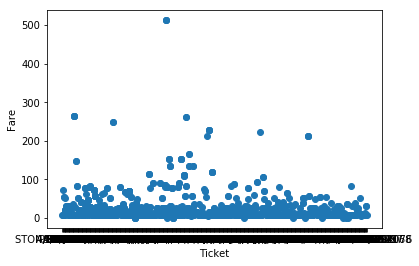

In [474]:
plt.scatter(train.Ticket, train.Fare)
plt.xlabel('Ticket')
plt.ylabel('Fare')
plt.show() ## 그려보니 티켓 번호와는 관련이 없는 듯? -> 지운다

In [475]:
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [476]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Other
0,3,34.5,0,0,7.8292,NaN,0,1,0,1,0,0,0,1,0,0
1,3,47.0,1,0,7.0000,NaN,1,0,0,0,1,0,0,0,1,0
2,2,62.0,0,0,9.6875,NaN,0,1,0,1,0,0,0,1,0,0
3,3,27.0,0,0,8.6625,NaN,0,1,0,0,1,0,0,1,0,0
4,3,22.0,1,1,12.2875,NaN,1,0,0,0,1,0,0,0,1,0


6. Cabin

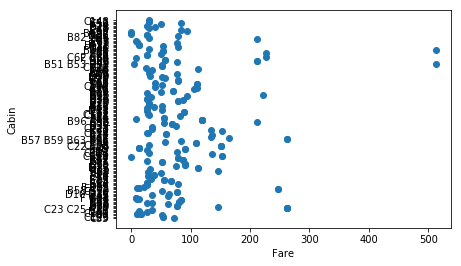

In [477]:
plt.scatter(train['Fare'].loc[train['Cabin'].isnull()==False], train['Cabin'].loc[train['Cabin'].isnull()==False])
plt.xlabel('Fare')
plt.ylabel('Cabin')
plt.show() ## Cabin도 딱히 없다 -> 지움

In [478]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [479]:
test.head(30)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Other
0,3,34.5,0,0,7.8292,0,1,0,1,0,0,0,1,0,0
1,3,47.0,1,0,7.0000,1,0,0,0,1,0,0,0,1,0
2,2,62.0,0,0,9.6875,0,1,0,1,0,0,0,1,0,0
3,3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1,0,0
4,3,22.0,1,1,12.2875,1,0,0,0,1,0,0,0,1,0
5,3,14.0,0,0,9.2250,0,1,0,0,1,0,0,1,0,0
6,3,30.0,0,0,7.6292,1,0,0,1,0,0,1,0,0,0
7,2,26.0,1,1,29.0000,0,1,0,0,1,0,0,1,0,0
8,3,18.0,0,0,7.2292,1,0,1,0,0,0,0,0,1,0
9,3,21.0,2,0,24.1500,0,1,0,0,1,0,0,1,0,0


In [480]:
train['Family']=(train['SibSp']+train['Parch']+1)
test['Family']=(test['SibSp']+test['Parch']+1)

In [493]:
train.drop('SibSp', axis=1, inplace=True)
train.drop('Parch', axis=1, inplace=True)

test.drop('SibSp', axis=1, inplace=True)
test.drop('Parch', axis=1, inplace=True)

In [506]:
train['Fare']=train['Fare'].astype('int')
train['Age']=train['Age'].astype('int')

In [507]:
test['Fare']=test['Fare'].astype('int')
test['Age']=test['Age'].astype('int')

In [494]:
test.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Other,Family
0,3,34,7.8292,0,1,0,1,0,0,0,1,0,0,1
1,3,47,7.0000,1,0,0,0,1,0,0,0,1,0,2
2,2,62,9.6875,0,1,0,1,0,0,0,1,0,0,1
3,3,27,8.6625,0,1,0,0,1,0,0,1,0,0,1
4,3,22,12.2875,1,0,0,0,1,0,0,0,1,0,3


In [495]:
train.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Other,Family
0,0,3,22,7.0,0,1,0,0,1,0,0,1,0,0,2
1,1,1,38,71.0,1,0,1,0,0,0,0,0,1,0,2
2,1,3,26,7.0,1,0,0,0,1,0,1,0,0,0,1
3,1,1,35,53.0,1,0,0,0,1,0,0,0,1,0,2
4,0,3,35,8.0,0,1,0,0,1,0,0,1,0,0,1


In [519]:
y = train['Survived']
x = train.drop('Survived', axis=1)

In [544]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [545]:
clf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=1, random_state=0)

In [546]:
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [549]:
y_pred= clf.predict(X_test)

In [551]:
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)
print(f'Mean accuracy score: {accuracy:.3}')

0.8246268656716418
Mean accuracy score: 0.825
